deep learning project for image classification using the MNIST dataset

In [8]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 36s 43ms/step - loss: 0.2151 - accuracy: 0.9339 - val_loss: 0.0722 - val_accuracy: 0.9790
Epoch 2/10
750/750 [==============================] - 36s 48ms/step - loss: 0.0591 - accuracy: 0.9815 - val_loss: 0.0477 - val_accuracy: 0.9857
Epoch 3/10
750/750 [==============================] - 32s 43ms/step - loss: 0.0408 - accuracy: 0.9874 - val_loss: 0.0476 - val_accuracy: 0.9860
Epoch 4/10
750/750 [==============================] - 32s 43ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0386 - val_accuracy: 0.9888
Epoch 5/10
750/750 [==============================] - 30s 40ms/step - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0397 - val_accuracy: 0.9885
Epoch 6/10
750/750 [==============================] - 33s 44ms/step - loss: 0.0203 - accuracy: 0.9931 - val_loss: 0.0360 - val_accuracy: 0.9896
Epoch 7/10
750/750 [==============================] - 31s 42ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0401 - val_accuracy:

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0345 - accuracy: 0.9909
Test Accuracy: 0.9908999800682068


In [6]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 8ms/step


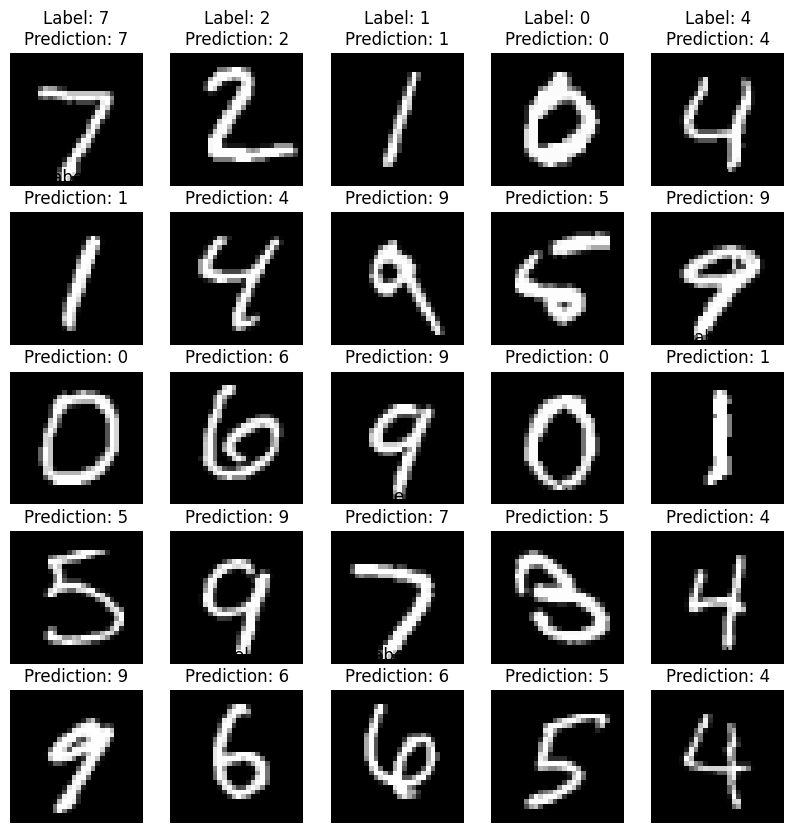

In [9]:
# Visualize some predictions
def plot_images(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}\nPrediction: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

plot_images(test_images, np.argmax(test_labels, axis=1), predictions)